In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

In [4]:
mnist = tf.keras.datasets.mnist
data = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


spilting the dataset
add a new dimension to each image to include the channel for grayscale data. Now, instead of (28, 28), our data has the shape (28, 28, 1)

In [5]:
(train_val_data, train_val_label), (test_data, test_label) = data


train_data, valid_data, train_label, valid_label = train_test_split(train_val_data,
                                                                    train_val_label,
                                                                    random_state=42,
                                                                    test_size=0.2,
                                                                    stratify=train_val_label)

print(train_data.shape, train_label.shape)
print(valid_data.shape, valid_label.shape)
print(test_data.shape, test_label.shape)

train_data = train_data[..., np.newaxis]
valid_data = valid_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]
print('---------------------------')
print(train_data.shape, train_label.shape)
print(valid_data.shape, valid_label.shape)
print(test_data.shape, test_label.shape)


(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)
---------------------------
(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)
(10000, 28, 28, 1) (10000,)


prepare our data for training, we normalize the pixel values to be between 0 and 1. This helps the model train faster and more efficiently

In [6]:
print(train_data.min(), train_data.max())
print(valid_data.min(), valid_data.max())
print(test_data.min(), test_data.max())

train_data = train_data.astype('float32') / 255.0
valid_data = valid_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

print('---------------------------')

print(train_data.min(), train_data.max())
print(valid_data.min(), valid_data.max())
print(test_data.min(), test_data.max())

0 255
0 255
0 255
---------------------------
0.0 1.0
0.0 1.0
0.0 1.0


create an ImageDataGenerator for the training data with the following augmentations:

Rotation (rotation_range=10): Images can rotate up to 10 degrees.
Width Shift (width_shift_range=0.1): Images can shift horizontally by 10% of their width.
Height Shift (height_shift_range=0.1): Images can shift vertically by 10% of their height.
Zoom (zoom_range=0.1): Images can zoom in or out by 10%cc

In [7]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1)

val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train = train_datagen.flow(train_data, train_label, batch_size=32, seed=42, shuffle=True)
val = val_datagen.flow(valid_data, valid_label, batch_size=32, shuffle=False)
test = test_datagen.flow(test_data, test_label, batch_size=32, shuffle=False)

In [8]:
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),

    # 1st CNN Layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    # 2nd CNN Layer
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    # 3rd CNN Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),

    # Flattening Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layer
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax),
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = [tf.keras.metrics.SparseCategoricalAccuracy])


In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Stop training after 3 epochs without improvement
    verbose=1,                   # Print a message when stopping
    mode='min',                  # Looking for the minimum validation loss
    restore_best_weights=True,   # Restore weights from the best epoch
)

history = model.fit(
    train,
    epochs=20,
    validation_data=val,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 359s 237ms/step - loss: 0.7724 - sparse_categorical_accuracy: 0.7590 - val_loss: 0.0779 - val_sparse_categorical_accuracy: 0.9770
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 360s 240ms/step - loss: 0.1652 - sparse_categorical_accuracy: 0.9499 - val_loss: 0.0657 - val_sparse_categorical_accuracy: 0.9781
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 359s 239ms/step - loss: 0.1297 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.0345 - val_sparse_categorical_accuracy: 0.9891
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 385s 241ms/step - loss: 0.1102 - sparse_categorical_accuracy: 0.9669 - val_loss: 0.0367 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 380s 240ms/step - loss: 0.1001 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.0317 - val_sparse_categorical_accuracy: 0.9910
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 383s 241ms/step - loss: 0.0862 - sparse_categorical_accuracy: 0.9735 - val_loss: 0.0265 - val_sparse_categori

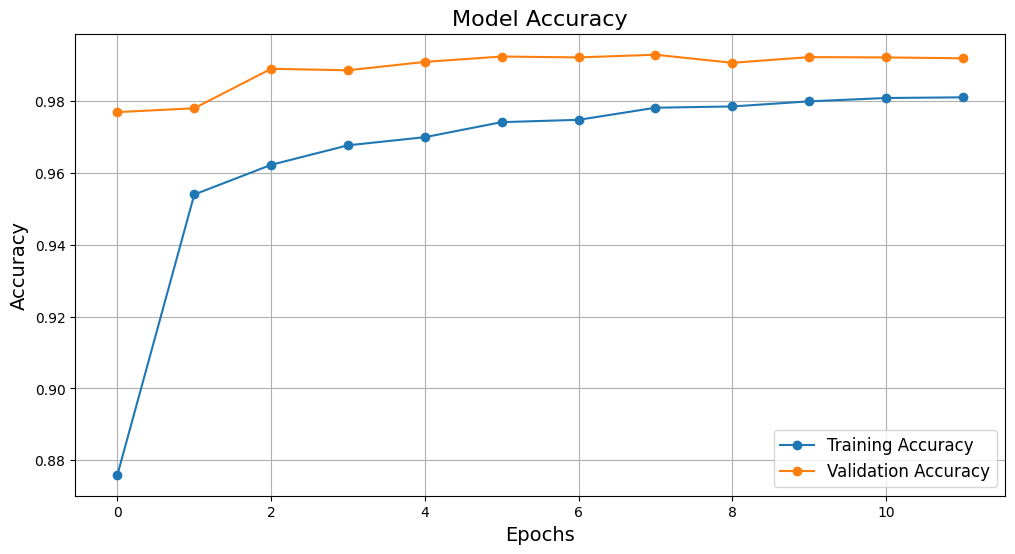

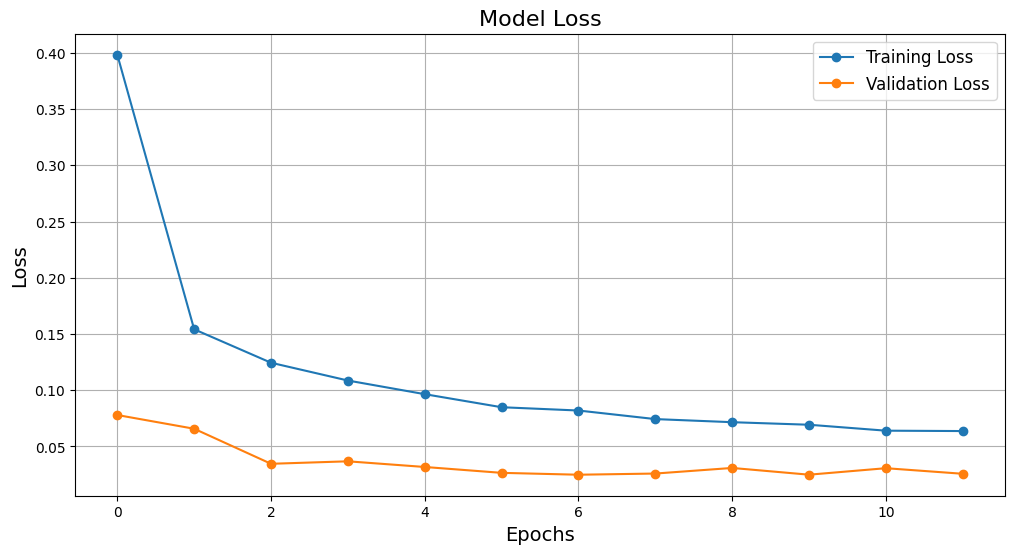

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [11]:
model.evaluate(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9946


[0.01544212456792593, 0.9948999881744385]

In [12]:
pred = model.predict(test)
pred_y = pred.argmax(axis=1)
print(classification_report(test.y, pred_y))

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.99      1.00      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



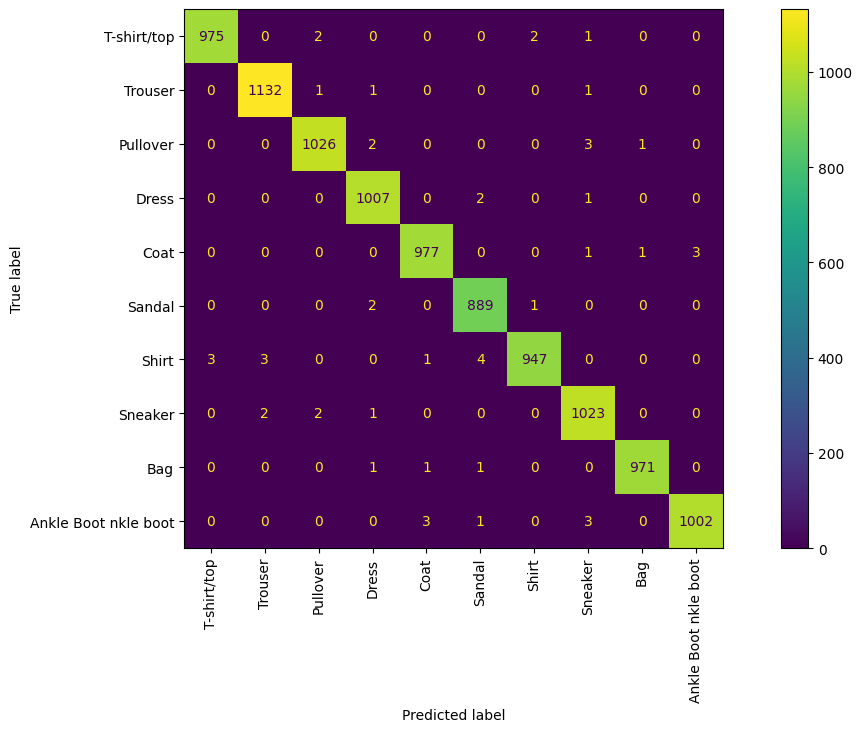

In [13]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot nkle boot']

fig, ax = plt.subplots(figsize=(15, 7))

disp = ConfusionMatrixDisplay(confusion_matrix(test.y, pred_y), display_labels=label)
disp.plot(ax=ax)
plt.xticks(rotation = 90)
plt.show()